<a href="https://colab.research.google.com/github/P-Dammy/Convolutional-Neural-Network-CNN-for-Image-Recognition-with-CIFAR-10-Dataset-and-Data-Augmentation/blob/main/Image_Recorgnition_Using_CNN_with_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Combining train and test sets for Exploratory Data Analysis
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


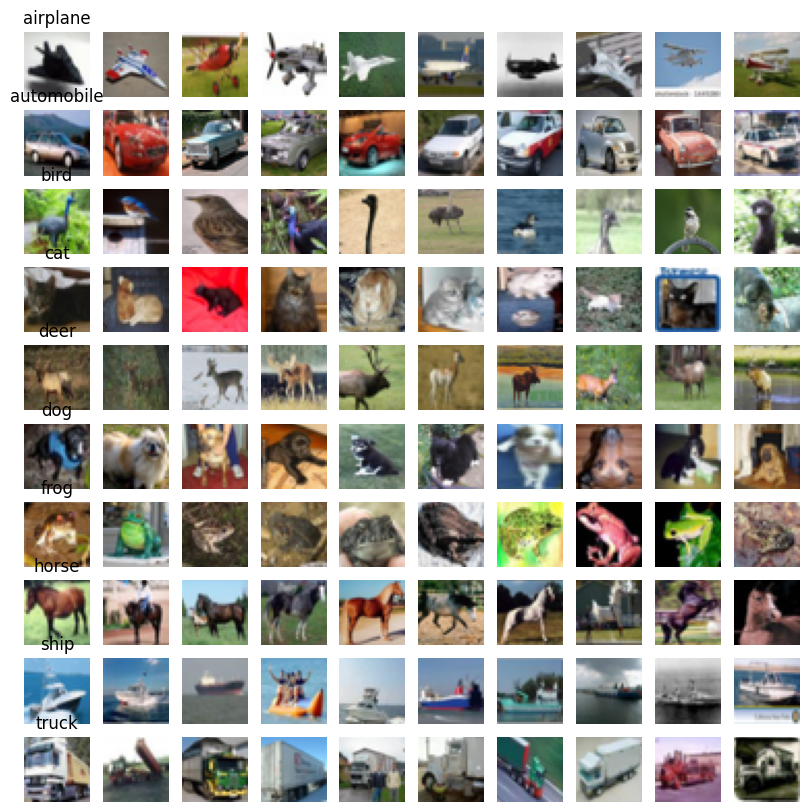

In [3]:
# Plottig sample images from each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(X, y, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        idx = np.where(y == i)[0][:10]  # Get 10 samples from each class
        for j in range(10):
            plt.subplot(10, 10, i * 10 + j + 1)
            plt.imshow(X[idx[j]])
            plt.axis('off')
            if j == 0:
                plt.title(class_names[i])
    plt.show()

plot_sample_images(X, y, class_names)


In [4]:
# Normalizing the pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Converting class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [5]:
# Constructing an Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining the data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fitting the generator to training data
datagen.fit(X_train)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# Defining early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model using augmented data with early stopping
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.2474 - loss: 2.0015 - val_accuracy: 0.4513 - val_loss: 1.4903
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.4425 - loss: 1.5397 - val_accuracy: 0.5291 - val_loss: 1.2899
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.4989 - loss: 1.3932 - val_accuracy: 0.5859 - val_loss: 1.1603
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5335 - loss: 1.3140 - val_accuracy: 0.5894 - val_loss: 1.1160
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.5657 - loss: 1.2314 - val_accuracy: 0.6225 - val_loss: 1.0448
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5826 - loss: 1.1839 - val_accuracy: 0.6334 - val_loss: 1.0226
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.6032 - loss: 1.1304 - val_accuracy: 0.6327 - val_loss: 1.0350
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.6105 - loss: 1.1113 - val_accurac

In [8]:
# Evaluating the model on the train set
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f'Train Accuracy: {train_acc:.4f}')

Train Accuracy: 0.7625


In [9]:
# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7430


In [10]:
# Evaluating the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Accuracy: {val_acc:.4f}')

Validation Accuracy: 0.7456


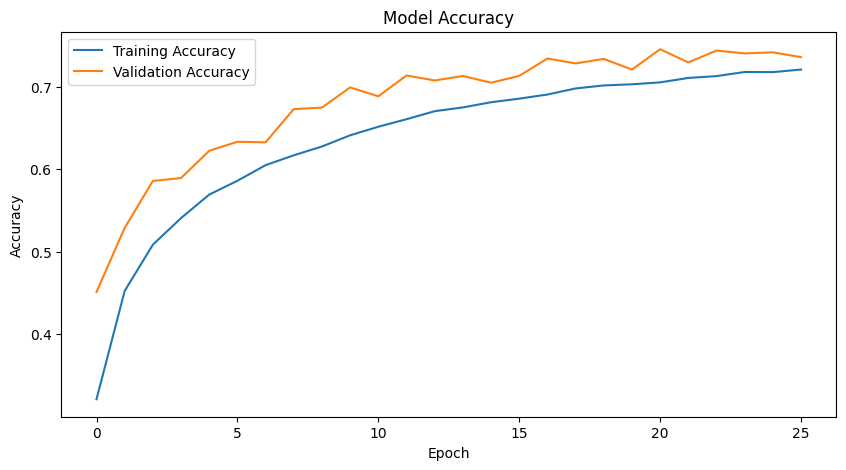

In [11]:
# Plotting training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

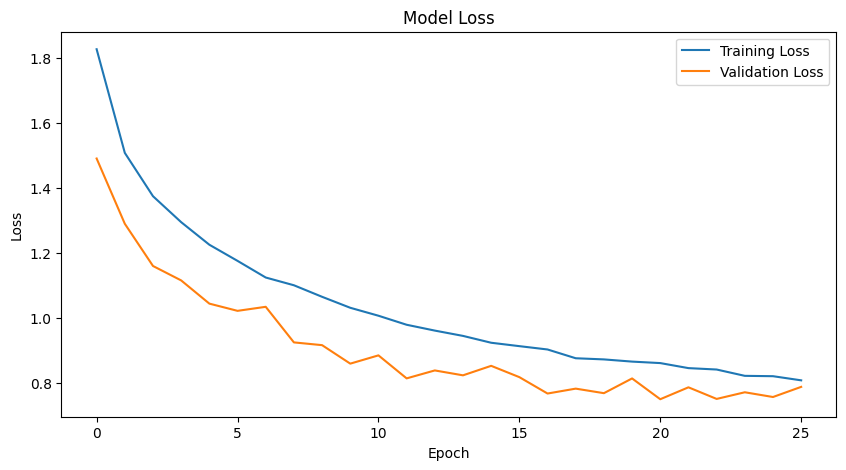

In [12]:
# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [13]:
# Predicting on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


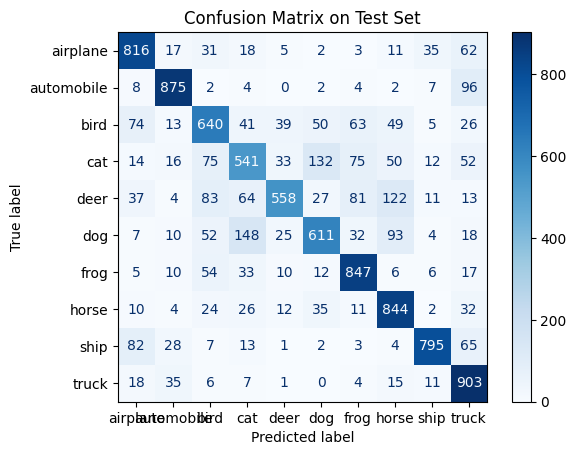

In [14]:
# Generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Test Set')
plt.show()

######The Diagonal element clearly shows the corrrect prediction: i.e instances whereby the true image matches the predicted image. The result here shows a high level of accuracy considerably